# MSc Thesis - Hugo Stam

### Example 01 - Onshore Port System

<img src="Figures/system_layout_alternative_1B.png" style="width:1000px">

##### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
# %matplotlib inline
%matplotlib notebook
import seaborn as sns
sns.set(style="ticks")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# OpenTISim package
from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system_onshore

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets
from IPython.display import HTML

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

# 0. Prepare inputs

In [2]:
# iPython Widgests
life_cycle = widgets.IntSlider(value=10, min=10, max=30, step=5, description='Life cycle:')
annual_demand = widgets.IntSlider(value=1000000, min=500000, max=1500000, step=50000, description='Demand:')

container_ship = widgets.Dropdown(options=[('Post Panamax I (6,000 TEU)', 6000),
                                           ('New-Panamax (12,500 TEU)', 12500),
                                           ('ULCS (21,000 TEU)', 21000)], 
                                  value=12500, description='OGV:')

foreshore_slope = widgets.Dropdown(options=[('Gently (3 km/m)', 3.0), 
                                            ('Average (2 km/m)', 2.0),
                                            ('Steep (1 km/m)', 1.0)], 
                                   value=2.0, description='Slope:')

print('\033[1m*** Input Values \033[0m')
display(annual_demand, container_ship, foreshore_slope, life_cycle)

*** Input Values 


IntSlider(value=1000000, description='Demand:', max=1500000, min=500000, step=50000)

Dropdown(description='OGV:', index=1, options=(('Post Panamax I (6,000 TEU)', 6000), ('New-Panamax (12,500 TEU…

Dropdown(description='Slope:', index=1, options=(('Gently (3 km/m)', 3.0), ('Average (2 km/m)', 2.0), ('Steep …

IntSlider(value=10, description='Life cycle:', max=30, min=10, step=5)

In [3]:
demand = annual_demand.value
design_container_ship = container_ship.value
slope = foreshore_slope.value
lifecycle = life_cycle.value

print('The annual demand:', demand, 'TEU')
print('The design container ship capacity:', design_container_ship, 'TEU')
print('The slope of the foreshore:', slope, 'in km reach per meter water depth')
print('The design life cycle:', lifecycle, 'years')

avg_parcel = design_container_ship / 8

startyear = 2020

The annual demand: 1000000 TEU
The design container ship capacity: 12500 TEU
The slope of the foreshore: 2.0 in km reach per meter water depth
The design life cycle: 10 years


## 0.1 Generate demand forecast scenario

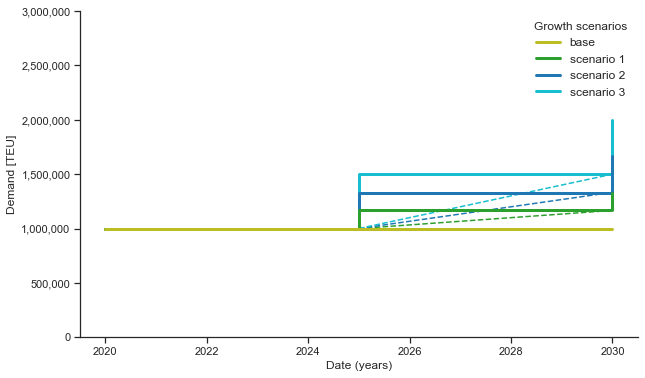

In [4]:
container = demand  # TEU
years = list(range(startyear, startyear+lifecycle+1))

trend_1 = []
trend_2 = []
trend_3 = []

for i in range(lifecycle-4):
    trend_1.append(container +   500_000/15 * i)
    trend_2.append(container + 1_000_000/15 * i)
    trend_3.append(container + 1_500_000/15 * i)

demand_0 = []
demand_1 = []
demand_2 = []
demand_3 = []

for year in years:
    if year < 2025:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.00))
        demand_2.append(int(container * 1.00))
        demand_3.append(int(container * 1.00))
        
    elif year < 2030:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.17))
        demand_2.append(int(container * 1.33))
        demand_3.append(int(container * 1.50))
    elif year < 2035:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.33))
        demand_2.append(int(container * 1.67))
        demand_3.append(int(container * 2.00))
    else:
        demand_0.append(int(container * 1.00))
        demand_1.append(int(container * 1.50))
        demand_2.append(int(container * 2.00))
        demand_3.append(int(container * 2.50))

# figure 
plt.figure(figsize=(10,6))

plt.plot(years[5:lifecycle+1], trend_1, color='tab:green', linestyle='--', zorder=0)
plt.plot(years[5:lifecycle+1], trend_2, color='tab:blue' , linestyle='--', zorder=0)
plt.plot(years[5:lifecycle+1], trend_3, color='tab:cyan' , linestyle='--', zorder=0)

plt.step(years, demand_0, color='tab:olive', linewidth=3, label='base', where='post', zorder=4)
plt.step(years, demand_1, color='tab:green', linewidth=3, label='scenario 1', where='post', zorder=3)
plt.step(years, demand_2, color='tab:blue' , linewidth=3, label='scenario 2', where='post', zorder=2)
plt.step(years, demand_3, color='tab:cyan' , linewidth=3, label='scenario 3', where='post', zorder=1)
    
plt.xlabel("Date (years)", fontsize='large')

if lifecycle == 20:
    plt.xticks([2020, 2025, 2030, 2035, 2040])

plt.yticks([0, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6],
           [0, '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'])
plt.ylabel('Demand [TEU]', fontsize='large')

plt.legend(loc='best', title='Growth scenarios', title_fontsize='large', fontsize='large', frameon=False)

# figure aesthetics
plt.grid(False, which='major')
sns.despine(top=True)

# save fig
if lifecycle == 20:
    plt.savefig("SaveFigures/growth_scenarios.png")

In [5]:
if lifecycle == 20:
    years = years[0:20]
    demand_0 = demand_0[0:20]
    demand_1 = demand_1[0:20]
    demand_2 = demand_2[0:20]
    demand_3 = demand_3[0:20]
    
if lifecycle == 10:
    years = years[0:10]
    demand_0 = demand_0[0:10]
    demand_1 = demand_1[0:10]
    demand_2 = demand_2[0:10]
    demand_3 = demand_3[0:10]

# print('Years: ', len(years), years)    
# print('Demand:', len(demand_2), demand_2)

In [6]:
years = list(range(startyear, startyear + lifecycle))
        
scenario_demand = demand_2
scenario_data={'year': years, 'volume': scenario_demand}
# print(scenario_data)

In [7]:
# instantiate Commodity objects, the inputs for the Commodity class
if design_container_ship == 6000:
    container_defaults.container_data['post_panamax_I_perc'] = 100
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 0

if design_container_ship == 12500:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 100
    container_defaults.container_data['ULCS_perc'] = 0
    
if design_container_ship == 21000:
    container_defaults.container_data['post_panamax_I_perc'] = 0
    container_defaults.container_data['new_panamax_perc'] = 0
    container_defaults.container_data['ULCS_perc'] = 100
    
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)
# print(container)
# print(container.scenario_data)

# combine
demand = [container]

## 0.2 Generate vessels

In [8]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

Specify the variables

In [9]:
Onshore = container_system_onshore.System(
          startyear = startyear,
          lifecycle = lifecycle,
          stack_equipment = 'rtg',
          laden_stack = 'rtg',
          elements = demand + vessels,
          crane_type_defaults = container_defaults.sts_crane_data,
          foreshore_slope = slope,
          bathymetry_factor = 0.50,
          allowable_berth_occupancy = 0.70,
          transhipment_ratio = 0.0,
          debug = True)

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, {revenues})
    7. calculate PV's {and aggregate to NPV}

In [10]:
Onshore.simulate()


Onshore Port System

Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:

Vessel dimensions design vessel:
Length 366
Draught 15.2
Beam 49.0

  *** add Access Channel to elements

Values according to PIANC 2014
Channel width 480 m
Channel depth 18.2 m
Channel length 36,400 m
Channel volume 159,000,000 m3
Turning circle diameter 658 m3
Turning circle volume 6,000,000 m3
Berth pocket width 98 m
Berth pocket volume 2,000,000 m3
Dredging volume 168,000,000 m3
The excavation depth at the Onshore Terminal 18.2 m


,Year,Capital Dredging,Maintenance Dredging
0,2020,1.047088e+09,0.000000e+00
1,2021,1.047088e+09,0.000000e+00
2,2022,0.000000e+00,7.539036e+07
3,2023,0.000000e+00,7.539036e+07
4,2024,0.000000e+00,7.539036e+07


     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

*** nr of OGV berths: 1
     >> max vessel length: 366
     >> The length of the quay is 396 m
     >> The water depth at the quay is 19 m

     >> The length of the quay that needs to be built 396 m

  *** add Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,28785033.6,0.00,0.00
1,2021,19190022.4,0.00,0.00
2,2022,0.0,405250.56,405250.56
3,2023,0.0,405250.56,405250.56
4,2024,0.0,405250.56,405250.56


     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 3.338
     Berth occupancy online  (after adding Crane): inf

*** nr of OGV berths: 1
  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 1.891
     Berth occupancy online  (after adding Crane): inf

*** nr of OGV berths: 1
  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 1.409
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 1.187
     Berth occupancy online  (after adding Berth): inf

*** nr of OGV berths: 2
     >> max vessel length: 366
     >> The length of the quay is 853 m
     >> The water depth at the quay is 19 m

     >> The length of the quay that needs to be built 457 m

  *** add Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,33001811.4,0.000,0.000
1,2021,22001207.6,0.000,0.000
2,2022,0.0,467880.192,467880.192
3,2023,0.0,467880.192,467880.192
4,2024,0.0,467880.192,467880.192


     Berth occupancy planned (after adding Quay): 1.187
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.946
     Berth occupancy online  (after adding Crane): inf

*** nr of OGV berths: 2
  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.801
     Berth occupancy online  (after adding Crane): inf

*** nr of OGV berths: 2
  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.705
     Berth occupancy online  (after adding Crane): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): 0.63
     Berth occupancy online  (after adding Berth): inf

*** nr of OGV berths: 3
     >> max vessel length: 366
     >> The length of the quay is 1,272 m
     >> The water depth at the quay is 19 m

     >> The length of the quay that needs to be built 419 m

  *** add Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,30376660.2,0.000,0.000
1,2021,20251106.8,0.000,0.000
2,2022,0.0,428890.176,428890.176
3,2023,0.0,428890.176,428890.176
4,2024,0.0,428890.176,428890.176


     Berth occupancy planned (after adding Quay): 0.63
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,11695500.0,0.0,0.0,0.0
2,2022,0.0,305100.0,101700.0,687500.0
3,2023,0.0,305100.0,101700.0,687500.0
4,2024,0.0,305100.0,101700.0,687500.0


     Berth occupancy planned (after adding Crane): 0.561
     Berth occupancy online  (after adding Crane): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 7
     Horizontal Transport online  (@ start of year): 0
     Horizontal Transport planned (@ start of year): 0
  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,114000.0,0.0,0.0
2,2022,0.0,11300.0,125000.0
3,2023,0.0,11300.0,125000.0
4,2024,0.0,11300.0,125000.0


     Stack Capacity planned  (@ start of year): 0
     Stack Capacity online   (@ start of year): 0
     Stack Capacity required (@ start of year): 12912
     Laden and Reefer Ground Slots required (@ start of year): 2582

  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,2071150.0,0.0
2,2022,0.0,165240.0
3,2023,0.0,165240.0
4,2024,0.0,165240.0


     Empty Stack capacity planned  (@ start of year): 0
     Empty Stack capacity online   (@ start of year): 0
     Empty Stack capacity required (@ start of year): 3571
     Empty Ground Slots required   (@ start of year): 595

  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,759400.0,0.0
2,2022,0.0,73440.0
3,2023,0.0,73440.0
4,2024,0.0,73440.0


     OOG Slots planned  (@ start of year): 0
     OOG Slots online   (@ start of year): 0
     OOG Slots required (@ start of year): 239

  *** add OOG stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,1705000.0,0.0
2,2022,0.0,168000.0
3,2023,0.0,168000.0
4,2024,0.0,168000.0


  *** add OOG stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,1705000.0,0.0
2,2022,0.0,168000.0
3,2023,0.0,168000.0
4,2024,0.0,168000.0


  *** add OOG stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,1705000.0,0.0
2,2022,0.0,168000.0
3,2023,0.0,168000.0
4,2024,0.0,168000.0


     Total Ground Slots required   (@ start of year):  3,178
     Total Stack capacity required (@ start of year):  16,700 TEU
     Total Stack capacity online   (@ start of year):  0 TEU

     Number of stack Equipment online (@ start of year): 0

     Empty handlers planned (@ start of year): 0
  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,505000.0,0.0,0.0
2,2022,0.0,10000.0,125000.0
3,2023,0.0,10000.0,125000.0
4,2024,0.0,10000.0,125000.0


>>> Total onshore land use 27.0 ha
     Hinterland Gate capacity planned     (@ start of year): 0
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of year): 0
     Hinterland Gate service rate planned (@ start of year): inf

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 1
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 2
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 3
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 4
  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,107187.0,0.0,0.0
2,2022,0.0,600.0,250000.0
3,2023,0.0,600.0,250000.0
4,2024,0.0,600.0,250000.0


     >> nr of hinterland lanes: 5

     Hinterland barge berth capacity planned     (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): inf [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 114630.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

*** nr of hinterland barge berths: 1
*** nr of hinterland barge quays: 0
     >> The length of the quay is 130 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 130 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4804044.0,0.0,0.0
1,2021,3202696.0,0.0,0.0
2,2022,0.0,61942.4,61942.4
3,2023,0.0,61942.4,61942.4
4,2024,0.0,61942.4,61942.4


     Hinterland barge berth capacity planned     (@ start of year): 114633.792 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 4.798 [-]

*** nr of hinterland barge cranes: 0
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 1
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 2
     Hinterland barge crane capacity planned (after adding Crane): 114630.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 229270.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

*** nr of hinterland barge berths: 2
*** nr of hinterland barge quays: 1
     >> The length of the quay is 268 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 138 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,5062754.4,0.00,0.00
1,2021,3375169.6,0.00,0.00
2,2022,0.0,65754.24,65754.24
3,2023,0.0,65754.24,65754.24
4,2024,0.0,65754.24,65754.24


     Hinterland barge berth capacity planned     (@ start of year): 229267.584 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 2.399 [-]

*** nr of hinterland barge cranes: 2
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 3
     Hinterland barge crane capacity planned (after adding Crane): 229270.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 343900.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

*** nr of hinterland barge berths: 3
*** nr of hinterland barge quays: 2
     >> The length of the quay is 394 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 343901.376 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.599 [-]

*** nr of hinterland barge cranes: 3
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 4
     Hinterland barge crane capacity planned (after adding Crane): 343900.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 458540.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

*** nr of hinterland barge berths: 4
*** nr of hinterland barge quays: 3
     >> The length of the quay is 521 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690858.2,0.00,0.00
1,2021,3127238.8,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 458535.168 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.199 [-]

*** nr of hinterland barge cranes: 4
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 5
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 6
     Hinterland barge crane capacity planned (after adding Crane): 458540.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 0 [TEU/yr]

*** nr of hinterland barge berths: 5
*** nr of hinterland barge quays: 4
     >> The length of the quay is 647 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,4690857.6,0.00,0.00
1,2021,3127238.4,0.00,0.00
2,2022,0.0,60274.72,60274.72
3,2023,0.0,60274.72,60274.72
4,2024,0.0,60274.72,60274.72


     Hinterland barge berth capacity planned     (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.96 [-]

*** nr of hinterland barge cranes: 6
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,7797000.0,0.0,0.0,0.0
2,2022,0.0,135600.0,67800.0,187500.0
3,2023,0.0,135600.0,67800.0,187500.0
4,2024,0.0,135600.0,67800.0,187500.0


*** nr of onshore barge cranes: 7
     Hinterland barge crane capacity planned (after adding Crane): 573170.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 0 [TEU/yr]


Onshore Port System

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:

Vessel dimensions design vessel:
Length 366
Draught 15.2
Beam 49.0

     Berth occupancy planned (@ start of year): 0.561
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): 0.413
     Crane occupancy online  (@ start of year): inf

     STS cranes online            (@ start of year): 0
     STS cranes planned           (@ start of year): 7
     Horizontal Transport online  (@ star

,Year,Onshore Capex,Onshore Maintenance
0,2020,3.407863e+07,0.000000
1,2021,0.000000e+00,511179.508125
2,2022,0.000000e+00,511179.508125
3,2023,0.000000e+00,511179.508125
4,2024,0.000000e+00,511179.508125


     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 0
     Hinterland Gate capacity required    (@ start of year): 264
     Hinterland Gate service rate planned (@ start of year): 0.879


     Hinterland barge berth capacity planned     (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.96 [-]


Onshore Port System

Below, the various investment decisions are evaluated for the year 2022.

Simulate year: 2022
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000

  Start analysis:

Vessel dimensions design vessel:
Length

,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,1405000.0,0.0,0.0
2,2022,0.0,700000.0,125000.0
3,2023,0.0,700000.0,125000.0
4,2024,0.0,700000.0,125000.0


     Empty handlers planned (@ start of year): 35
>>> Total onshore land use 31.1 ha
     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 300
     Hinterland Gate capacity required    (@ start of year): 264
     Hinterland Gate service rate planned (@ start of year): 0.879


     Hinterland barge berth capacity planned     (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 550000.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.96 [-]


Onshore Port System

Below, the various investment decisions are evaluated for the year 2023.

Simulate year: 2023
  Total vessel calls: 640
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 640
  VLCS calls: 0
  ULCS call

,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


     Berth occupancy planned (after adding Crane): 0.679
     Berth occupancy online  (after adding Crane): 0.747

     STS cranes online            (@ start of year): 7
     STS cranes planned           (@ start of year): 8
     Horizontal Transport online  (@ start of year): 35
     Horizontal Transport planned (@ start of year): 35
  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Tractor Trailer to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Stack Capacity planned  (@ start of year): 13500
     Stack Capacity online   (@ start of year): 13500
     Stack Capacity required (@ start of year): 17174
     Laden and Reefer Ground Slots required (@ start of year): 3435

  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


  *** add Laden Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


     Empty Stack capacity planned  (@ start of year): 3840
     Empty Stack capacity online   (@ start of year): 3840
     Empty Stack capacity required (@ start of year): 4750
     Empty Ground Slots required   (@ start of year): 792

  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


  *** add Empty Stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


     OOG Slots planned  (@ start of year): 300
     OOG Slots online   (@ start of year): 300
     OOG Slots required (@ start of year): 318

  *** add OOG stack to elements


,Year,Onshore Capex,Onshore Maintenance
0,2020,0.0,0.0
1,2021,0.0,0.0
2,2022,0.0,0.0
3,2023,0.0,0.0
4,2024,0.0,0.0


     Total Ground Slots required   (@ start of year):  4,226
     Total Stack capacity required (@ start of year):  22,200 TEU
     Total Stack capacity online   (@ start of year):  17,600 TEU

     Number of stack Equipment online (@ start of year): 21

     Empty handlers planned (@ start of year): 35
  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Empty Handler to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


>>> Total onshore land use 35.7 ha
     Hinterland Gate capacity planned     (@ start of year): 300
     Hinterland Gate capacity online      (@ start of year): 300
     Hinterland Gate capacity required    (@ start of year): 351
     Hinterland Gate service rate planned (@ start of year): 1.169

  *** add Hinterland Gate to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     >> nr of hinterland lanes: 6

     Hinterland barge berth capacity planned     (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 731500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.276 [-]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 687800.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

*** nr of hinterland barge berths: 6
*** nr of hinterland barge quays: 5
     >> The length of the quay is 774 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 687802.752 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 731500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 1.064 [-]

*** nr of hinterland barge cranes: 7
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


*** nr of onshore barge cranes: 8
     Hinterland barge crane capacity planned (after adding Crane): 687800.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Berth to elements
     Hinterland barge berth capacity planned (after adding Berth): 802440.0 [TEU/yr]
     Hinterland barge berth capacity online  (after adding Berth): 573170.0 [TEU/yr]

*** nr of hinterland barge berths: 7
*** nr of hinterland barge quays: 6
     >> The length of the quay is 900 m
     >> The water depth at the quay is 9 m

     >> The length of the hinterland barge quay that needs to be built 126 m

  *** add Hinterland Barge Quay to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Hinterland barge berth capacity planned     (@ start of year): 802436.544 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573168.96 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 731500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.912 [-]

*** nr of hinterland barge cranes: 8
  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


*** nr of onshore barge cranes: 9
     Hinterland barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]

  *** add Hinterland Barge Crane to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Labour
0,2020,0.0,0.0,0.0,0.0
1,2021,0.0,0.0,0.0,0.0
2,2022,0.0,0.0,0.0,0.0
3,2023,0.0,0.0,0.0,0.0
4,2024,0.0,0.0,0.0,0.0


*** nr of onshore barge cranes: 10
     Hinterland barge crane capacity planned (after adding Crane): 802440.0 [TEU/yr]
     Hinterland barge crane capacity online  (after adding Crane): 573170.0 [TEU/yr]


Onshore Port System

Below, the various investment decisions are evaluated for the year 2026.

Simulate year: 2026
  Total vessel calls: 852
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 852
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1330000

  Start analysis:

Vessel dimensions design vessel:
Length 366
Draught 15.2
Beam 49.0

     Berth occupancy planned (@ start of year): 0.679
     Berth occupancy online  (@ start of year): 0.679
     Crane occupancy planned (@ start of year): 0.481
     Crane occupancy online  (@ start of year): 0.481

     STS cranes online            (@ start of year): 8
     STS cranes planned           (@ start of year): 8
     Horizontal Transport onl

,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


  *** add Stack Equipment to elements


,Year,Onshore Capex,Onshore Maintenance,Onshore Labour
0,2020,0.0,0.0,0.0
1,2021,0.0,0.0,0.0
2,2022,0.0,0.0,0.0
3,2023,0.0,0.0,0.0
4,2024,0.0,0.0,0.0


     Empty handlers planned (@ start of year): 40
>>> Total onshore land use 37.0 ha
     Hinterland Gate capacity planned     (@ start of year): 360
     Hinterland Gate capacity online      (@ start of year): 360
     Hinterland Gate capacity required    (@ start of year): 351
     Hinterland Gate service rate planned (@ start of year): 0.974


     Hinterland barge berth capacity planned     (@ start of year): 802440.0 [TEU/yr]
     Hinterland barge berth capacity online      (@ start of year): 573170.0 [TEU/yr]
     Hinterland barge berth capacity required    (@ start of year): 731500.0 [TEU/yr]
     Hinterland barge berth service rate planned (@ start of year): 0.912 [-]


Onshore Port System

Below, the various investment decisions are evaluated for the year 2027.

Simulate year: 2027
  Total vessel calls: 852
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 852
  VLCS calls: 0
  ULCS cal

>>> Total onshore land use 37.0 ha
>>> Total onshore land use 37.0 ha
>>> Total onshore land use 37.0 ha
  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,60000000.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,60000000.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,60000000.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


  *** add Ocean Transport Costs to elements


,Year,Ocean Transport
0,2020,0.0
1,2021,0.0
2,2022,0.0
3,2023,0.0
4,2024,0.0


>>> Total onshore land use 37.0 ha


,Onshore Capex,Onshore Opex,Capital Dredging,Maintenance Dredging,Ocean Transport
Years,,,,,
2020,1.501815e+08,0.000000e+00,1.047088e+09,0.000000e+00,0.000000e+00
2021,2.962587e+08,1.966204e+06,1.007785e+09,0.000000e+00,0.000000e+00
2022,0.000000e+00,4.997180e+07,0.000000e+00,6.983687e+07,5.558021e+07
2023,0.000000e+00,4.809605e+07,0.000000e+00,6.721546e+07,5.349394e+07
2024,0.000000e+00,4.629071e+07,0.000000e+00,6.469246e+07,5.148599e+07
2025,5.406686e+07,4.636327e+07,0.000000e+00,6.226415e+07,4.955341e+07
2026,4.971618e+06,5.057684e+07,0.000000e+00,5.992700e+07,4.769336e+07
2027,0.000000e+00,4.886283e+07,0.000000e+00,5.767758e+07,6.105118e+07
2028,0.000000e+00,4.702871e+07,0.000000e+00,5.551259e+07,5.875956e+07


#### Add cash flow information for each of the terminal elements.

In [11]:
demand = annual_demand.value

cash_flows_df, cash_flows_real_df = Onshore.add_cashflow_elements()
PV, PV_df, costs_df = Onshore.net_present_value(True)

,Onshore Capex,Onshore Opex,Capital Dredging,Maintenance Dredging,Ocean Transport
Years,,,,,
2020,1.501815e+08,0.000000e+00,1.047088e+09,0.000000e+00,0.000000e+00
2021,2.962587e+08,1.966204e+06,1.007785e+09,0.000000e+00,0.000000e+00
2022,0.000000e+00,4.997180e+07,0.000000e+00,6.983687e+07,5.558021e+07
2023,0.000000e+00,4.809605e+07,0.000000e+00,6.721546e+07,5.349394e+07
2024,0.000000e+00,4.629071e+07,0.000000e+00,6.469246e+07,5.148599e+07
2025,5.406686e+07,4.636327e+07,0.000000e+00,6.226415e+07,4.955341e+07
2026,4.971618e+06,5.057684e+07,0.000000e+00,5.992700e+07,4.769336e+07
2027,0.000000e+00,4.886283e+07,0.000000e+00,5.767758e+07,6.105118e+07
2028,0.000000e+00,4.702871e+07,0.000000e+00,5.551259e+07,5.875956e+07


In [12]:
Onshore.summary(year)

Onshore Terminal

Number of OGV channels: 1
Number of OGV berths: 3
Number of OGV quays walls: 3
Number of STS cranes: 8
Number of tractors: 40
Number of laden stacks: 20
Number of empty stacks: 10
Number of OOG stacks: 4
Number of stack equipment: 24
Number of hinterland lanes: 6
Number of hinterland berths: 7
Number of hinterland quay walls: 7
Number of hinterland cranes: 10


## 3. Report all elements

In [13]:
if True: 
    for element in Onshore.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__) # This is the dictionary containing the module's symbol table.


Laden

{'historic_data': [], 'scenario_data':    year   volume
0  2020  1000000
1  2021  1000000
2  2022  1000000
3  2023  1000000
4  2024  1000000
5  2025  1330000
6  2026  1330000
7  2027  1330000
8  2028  1330000
9  2029  1330000, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 0, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 0, 'new_panamax_perc': 100, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': 'e98edbee-7c04-11ea-a065-04d3b0b539c4'}

Fully_Cellular_1

{'triggers': [], 'offshore_labour': [], 'offshore_maintenance': [], 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': [], 'onshore_maintenance': [], 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': 


{'triggers': [], 'offshore_labour': [], 'offshore_maintenance': [], 'offshore_energy': [], 'offshore_insurance': [], 'offshore_fuel': [], 'onshore_labour': 125000, 'onshore_maintenance': 10000.0, 'onshore_energy': [], 'onshore_insurance': [], 'onshore_fuel': [], 'demurrage': [], 'ocean_transport': [], 'maintenance_dredging': [], 'bridge_opex': [], 'structure_maintenance': [], 'barge_maintenance': [], 'barge_operations': [], 'barge_labour': [], 'truck_maintenance': [], 'truck_operations': [], 'truck_labour': [], 'offshore_capex': [], 'onshore_capex': 505000, 'capital_dredging': [], 'bridge_capex': [], 'island_construction': [], 'coastal_protection_construction': [], 'barge_capex': [], 'truck_capex': [], 'type': 'empty_handler', 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 15, 'unit_rate': 500000, 'mobilisation': 5000, 'maintenance_perc': 0.02, 'crew': 1, 'salary': 35000, 'fuel_consumption': 1.5, 'required': 5, 'year_purchase': [], 'year_online': 2022, 'name': 'Empt

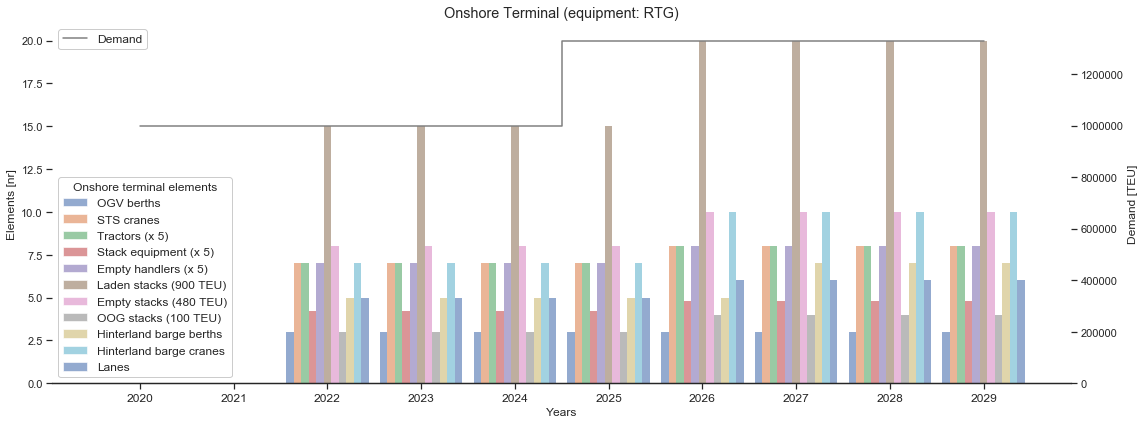

In [14]:
Onshore.terminal_elements_plot()
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/terminal_elements_1.png", bbox_inches = 'tight')
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/terminal_elements_2.png", bbox_inches = 'tight')

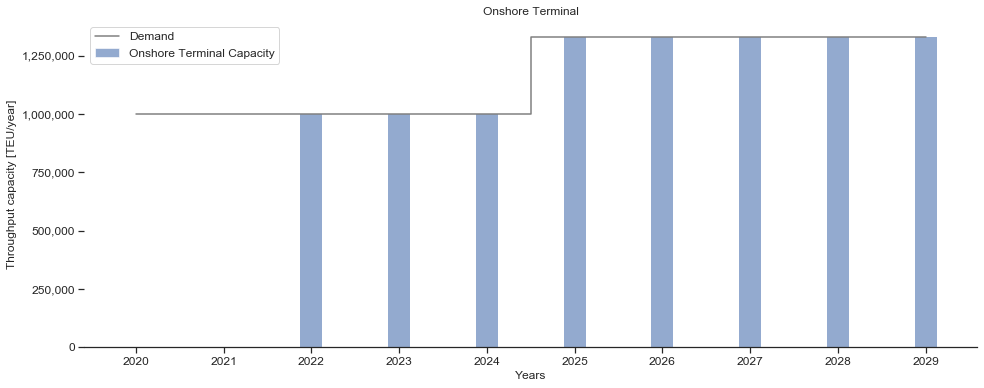

In [15]:
Onshore.terminal_capacity_plot()
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/terminal_capacity_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/terminal_capacity_2.png")

,Laden stack (ha),OOG stack (ha),Empty stack (ha),Total storage (ha),Total land use (ha)
Year,,,,,
2020,0.0000,0.000,0.00000,0.00000,0.00000
2021,0.0000,0.000,0.00000,0.00000,0.76000
2022,9.9144,2.016,2.35008,14.28048,27.76348
2023,9.9144,2.016,2.35008,14.28048,27.76348
2024,9.9144,2.016,2.35008,14.28048,27.76348
2025,9.9144,2.016,2.35008,14.28048,27.76348
2026,13.2192,2.688,2.93760,18.84480,32.32780
2027,13.2192,2.688,2.93760,18.84480,32.32780
2028,13.2192,2.688,2.93760,18.84480,32.32780


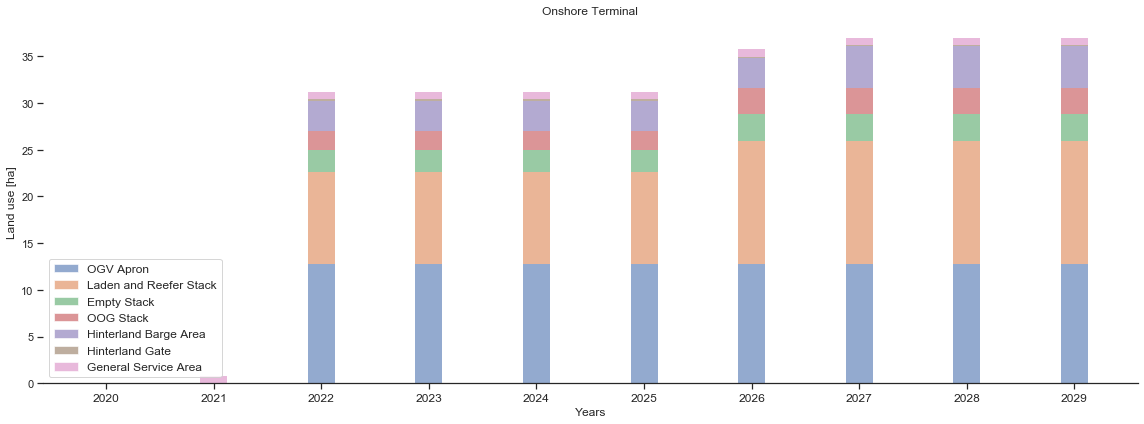

In [16]:
Onshore.terminal_land_use_plot(True)
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/storage_area_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/storage_area_2.png")

,Laden storage (TEU),Empty storage (TEU),OOG storage (TEU),Total storage (TEU)
Year,,,,
2020,0,0,0,0
2021,0,0,0,0
2022,13500,3840,300,17640
2023,13500,3840,300,17640
2024,13500,3840,300,17640
2025,13500,3840,300,17640
2026,18000,4800,400,23200
2027,18000,4800,400,23200
2028,18000,4800,400,23200


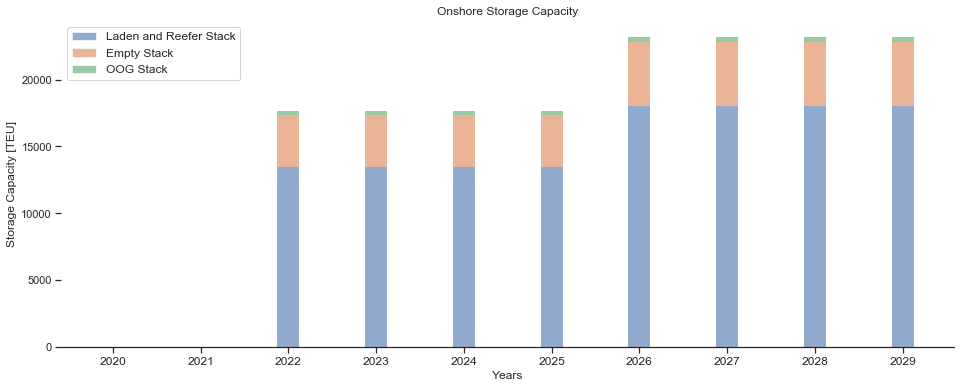

In [17]:
Onshore.storage_capacity_plot(True)
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/storage_capacity_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/storage_capacity_2.png")

In [18]:
# hide_columns_list = []
hide_columns_list = ['Demurrage']
cash_flows_real_df.style.hide_columns(hide_columns_list).hide_index()

Year,Onshore Capex,Onshore Maintenance,Onshore Insurance,Onshore Energy,Onshore Labour,Onshore Fuel,Ocean Transport,Capital Dredging,Maintenance Dredging
2020,1.50182e+08,0,0,0,0,0,0,1.04709e+09,0
2021,2.96259e+08,491992,0,1.47421e+06,0,0,0,1.00778e+09,0
2022,0,2.24407e+07,2.591e+06,4.40675e+06,1.73688e+07,3.1645e+06,5.55802e+07,0,6.98369e+07
2023,0,2.15984e+07,2.49375e+06,4.24133e+06,1.67169e+07,3.04572e+06,5.34939e+07,0,6.72155e+07
2024,0,2.07877e+07,2.40014e+06,4.08213e+06,1.60894e+07,2.93139e+06,5.1486e+07,0,6.46925e+07
2025,5.40669e+07,2.00074e+07,2.31005e+06,4.80798e+06,1.54854e+07,3.75241e+06,4.95534e+07,0,6.22642e+07
2026,4.97162e+06,2.24837e+07,2.46586e+06,4.62751e+06,1.73882e+07,3.61156e+06,4.76934e+07,0,5.9927e+07
2027,0,2.1732e+07,2.46553e+06,4.45381e+06,1.67355e+07,3.47599e+06,6.10512e+07,0,5.76776e+07
2028,0,2.09162e+07,2.37298e+06,4.28663e+06,1.61073e+07,3.34552e+06,5.87596e+07,0,5.55126e+07
2029,0,2.01311e+07,2.28391e+06,4.12573e+06,1.55027e+07,3.21994e+06,5.6554e+07,0,5.34289e+07


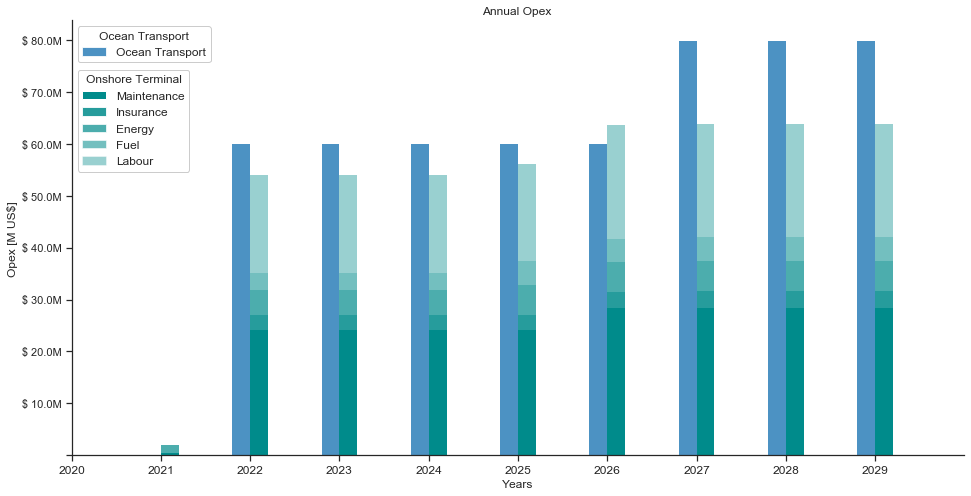

In [19]:
Onshore.terminal_opex_plot(cash_flows_df, False)
sns.despine(top=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/opex_1.png")
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/opex_2.png")

NameError: name 'ax2' is not defined

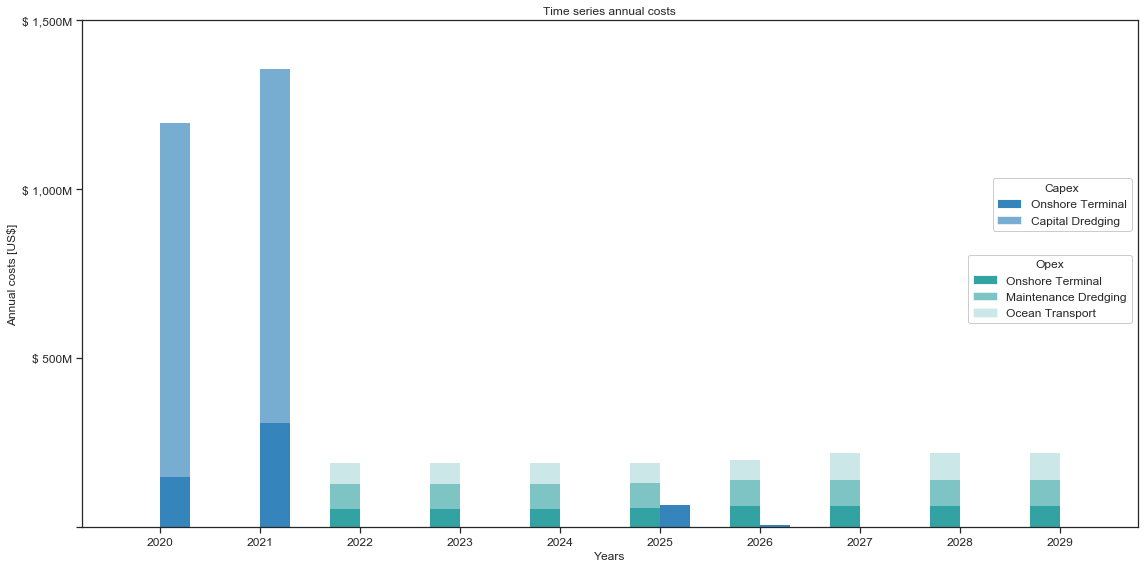

In [20]:
Onshore.cashflow_plot(cash_flows_df)
sns.despine(top=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/cash_flow_plot_1.png", bbox_inches = 'tight')
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/cash_flow_plot_2.png", bbox_inches = 'tight')

In [ ]:
scroll_to_current_cell(preserve=True)

print('*** PV of the costs: ${}'.format(f'{round(PV,-6):,}'))

Onshore.cashflow_plot(cash_flows_real_df)
sns.despine(left=True)

# save fig
if lifecycle == 10:
    if scenario_demand == demand_0:
        plt.savefig("SaveFigures/Alt_1/cash_flow_plot_real_1.png", bbox_inches = 'tight')
    if scenario_demand == demand_2:
        plt.savefig("SaveFigures/Alt_1/cash_flow_plot_real_2.png", bbox_inches = 'tight')

In [ ]:
Onshore.element_cashflow_plot(fig_x = 8, fig_y = 5)
sns.despine(top=True)

In [ ]:
print("Onshore terminal capacity for initial demand:")
total_onshore_ground_slots, total_onshore_stack_capacity, total_onshore_stack_online = Onshore.total_stack_capacity(2023)

total_onshore_ground_slots = round(total_onshore_ground_slots,-1)
total_onshore_stack_capacity = round(total_onshore_stack_capacity,-1)

In [ ]:
# save fig

        plt.savefig("SaveFigures/Alt_1/cash_flow_plot_real_1.png", bbox_inches = 'tight')